In [1]:
import numpy as np
import keras
from keras.applications import VGG16
from matplotlib import pyplot as plt
import os
import pathlib
import face_recognition
import cv2

In [19]:
data_dir = pathlib.Path('images').with_suffix('')

liam_hemsworth = list(data_dir.glob('liam_hemsworth/*.jp*'))
zooey_deschanel = list(data_dir.glob('zooey_deschanel/*.jp*'))

print(f'Amount of images of liam hemsworth: {len(liam_hemsworth)}')
print(f'Amount of images of zooey deschanel: {len(zooey_deschanel)}')

Amount of images of liam hemsworth: 10
Amount of images of zooey deschanel: 10


In [38]:
def resize(img):
    # resize the image to a max_width or max_height of 500px and keep the aspect ratio
    image = None
    max_width = 500
    if img.shape[1] > max_width:
        scale_factor = max_width / img.shape[1]
        image = cv2.resize(img, (int(img.shape[1] * scale_factor), int(img.shape[0] * scale_factor)))
    max_height = 500
    if img.shape[0] > max_height:
        scale_factor = max_height / img.shape[0]
        image = cv2.resize(img, (int(img.shape[1] * scale_factor), int(img.shape[0] * scale_factor)))
    return image if image is not None else img

In [39]:
def extract_images(image_paths_list: list):
    images = []
    for image_paths in image_paths_list:
        for image_path in image_paths:
            img = cv2.imread(str(image_path))
            # resize the image to a max_width or max_height of 500px and keep the aspect ratio
            img = resize(img)
            images.append(img)
    return images

In [40]:
images = extract_images([liam_hemsworth, zooey_deschanel])
copy_images = extract_images([liam_hemsworth, zooey_deschanel])

In [22]:
gray_images = []
for image in images:
    gray_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

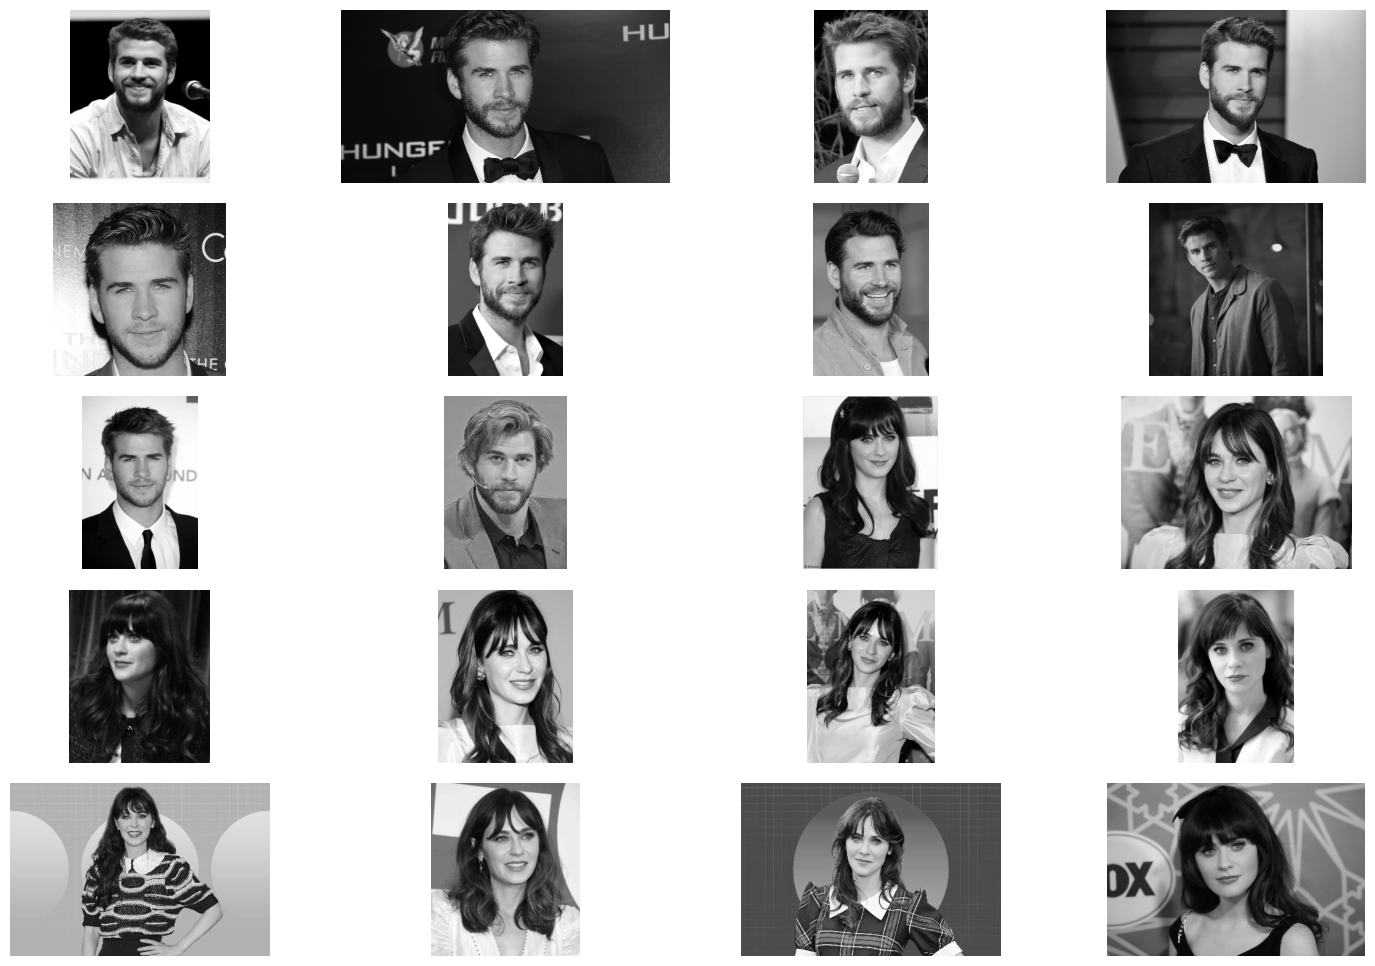

In [23]:
plt.figure(figsize=(15, 10))
for i, image in enumerate(gray_images):
    ax = plt.subplot(5, 4, i + 1)
    plt.tight_layout()
    plt.imshow(image, cmap='gray')
    plt.axis("off")

In [24]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [25]:
images_found = 0
image_face_locations = []
for i, image in enumerate(gray_images):
    face_locations = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    image_face_locations.append(face_locations)

    if len(face_locations) == 0:
        print(f'No faces found in image {i}')
    else:
        images_found += 1
    for (x, y, w, h) in face_locations:
        cv2.rectangle(images[i], (x, y), (x + w, y + h), (0, 255, 0), 4)

print(f'Images found: {images_found}')
# get amount of instances with multiple faces
multiple_faces = 0
for i, face_locations in enumerate(image_face_locations):
    if len(face_locations) > 1:
        multiple_faces += 1
print(f'Multiple faces found: {multiple_faces}')

Images found: 20
Multiple faces found: 1


In [26]:
images_colored = []
for image in images:
    images_colored.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

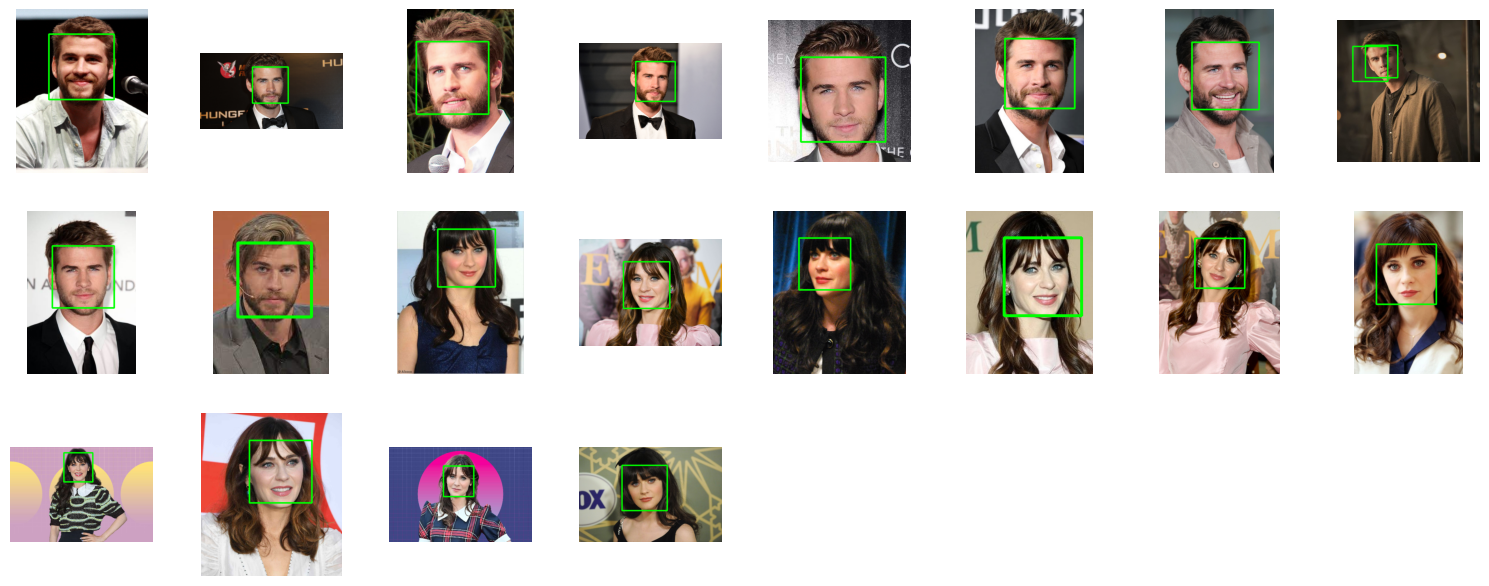

In [27]:
plt.figure(figsize=(15, 10))
for i, image in enumerate(images_colored):
    ax = plt.subplot(5, 8, i + 1)
    plt.tight_layout()
    plt.imshow(image)
    plt.axis("off")
plt.show()

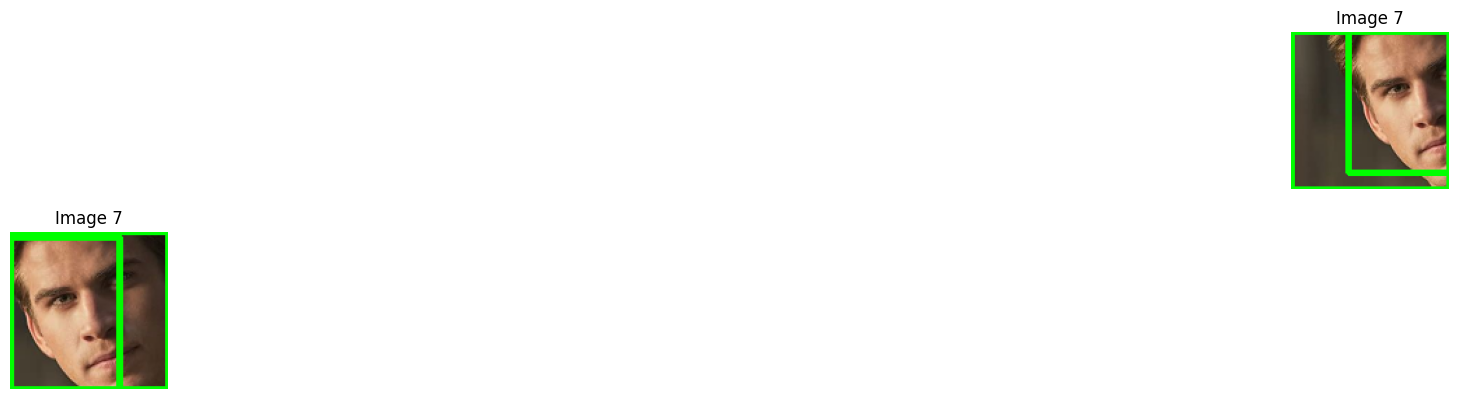

In [28]:
# show the images with multiple faces
plt.figure(figsize=(15, 10))
for i, face_locations in enumerate(image_face_locations):
    if len(face_locations) > 1:
        img = None
        for j, (x, y, w, h) in enumerate(face_locations):
            img = images_colored[i][y:y + h, x:x + w]
            ax = plt.subplot(5, 8, i + j + 1)
            plt.tight_layout()
            plt.imshow(img)
            plt.title(f'Image {i}')
            plt.axis("off")

In [29]:
def remove_duplicate_face_matches(face_locations: list, to_remove: [tuple]):
    for (image_idx, location_idx) in to_remove:
        face_locations[image_idx] = np.array(
            [np.delete(face_locations[image_idx], [i for i in range(location_idx * 4, location_idx * 4 + 4)])])

In [30]:
# manually remove the images with multiple faces
remove_duplicate_face_matches(image_face_locations, [(7, 0)])

In [31]:
images_copy_colored = []
for image in copy_images:
    images_copy_colored.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

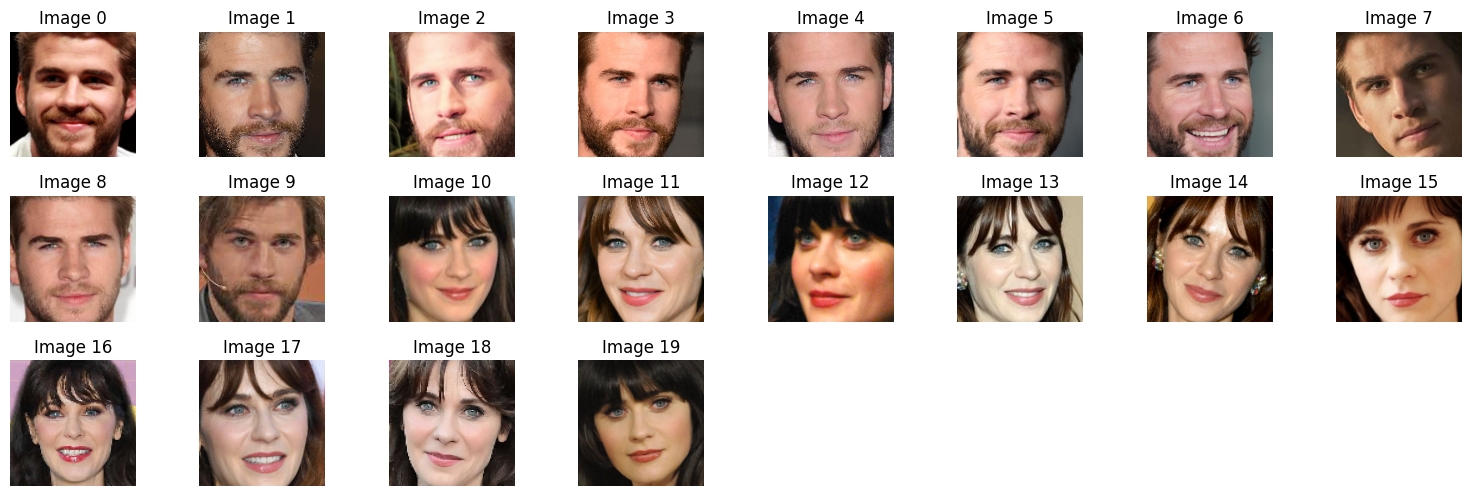

In [32]:
cropped_images = []
for i, image in enumerate(images_copy_colored):
    for (x, y, w, h) in image_face_locations[i]:
        cropped_images.append(image[y:y + h, x:x + w])

plt.figure(figsize=(15, 10))
for i, image in enumerate(cropped_images):
    ax = plt.subplot(6, 8, i + 1)
    plt.tight_layout()
    plt.imshow(image)
    plt.title(f'Image {i}')
    plt.axis("off")

In [36]:
# resize the images to 224x224
resized_images = np.array([cv2.resize(image, (224, 224)) for image in cropped_images])
resized_images.shape

(20, 224, 224, 3)

In [37]:
# save the cropped images to a folder called training_data
for i, image in enumerate(resized_images):
    sub_folder = 'liam_hemsworth' if i < 10 else 'zooey_deschanel'
    if not os.path.exists(f'processed_data/{sub_folder}'):
        os.makedirs(f'processed_data/{sub_folder}')
    cv2.imwrite(f'processed_data/{sub_folder}/image_{i}.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

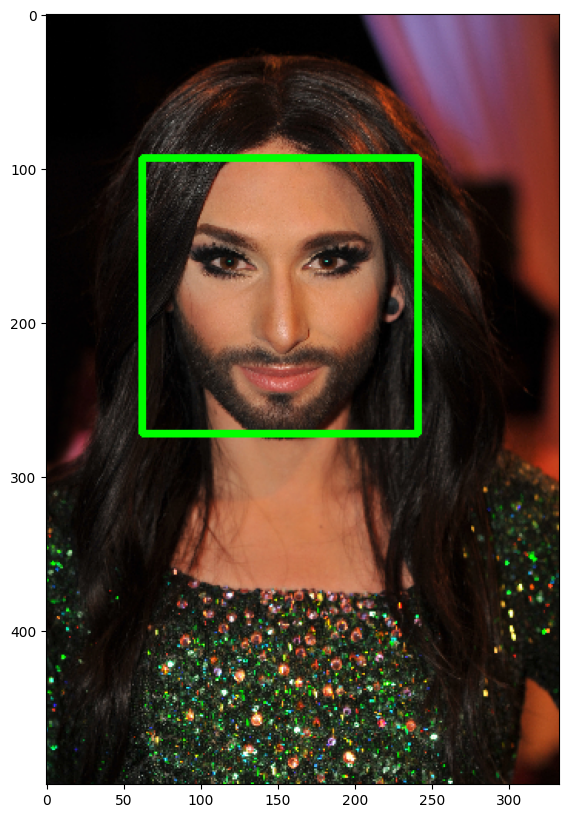

In [65]:
img = cv2.imread('breaking_data/Conchita Wurst Dancing Stars.jpg')
img_copy = cv2.imread('breaking_data/Conchita Wurst Dancing Stars.jpg')
# resize the image to a max_width or max_height of 500px and keep the aspect ratio
img = resize(img)
img_copy = resize(img_copy)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_locations = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
for (x, y, w, h) in face_locations:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(-0.5, 178.5, 178.5, -0.5)

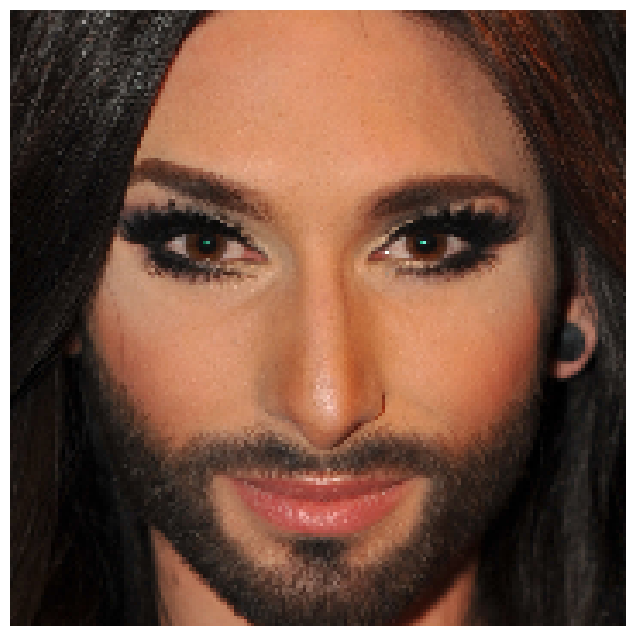

In [66]:
# crop the image
cropped_img = None
for (x, y, w, h) in face_locations:
    cropped_img = img_copy[y:y + h, x:x + w]
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [67]:
# resize the image to 224x224
resized_img = cv2.resize(cropped_img, (224, 224))
#save the image
cv2.imwrite('breaking_data/male/image.jpg', resized_img)

True

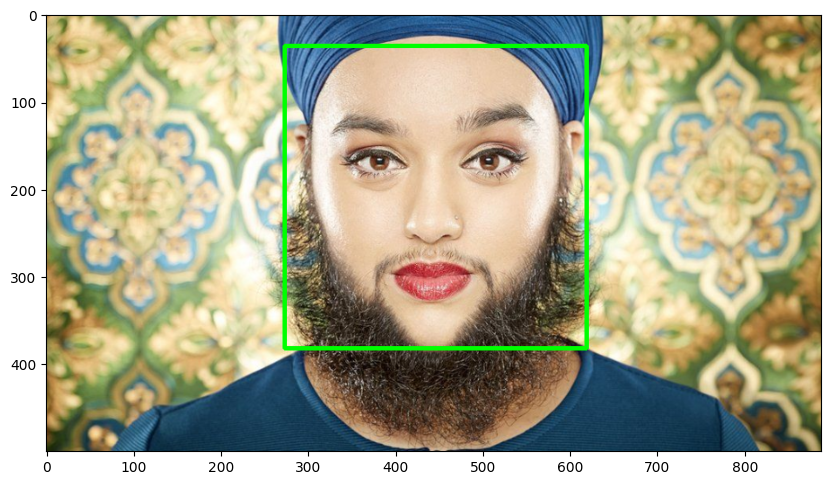

In [74]:
img = cv2.imread('breaking_data/woman with beard.jpg')
img_copy = cv2.imread('breaking_data/woman with beard.jpg')
# resize the image to a max_width or max_height of 500px and keep the aspect ratio
img = resize(img)
img_copy = resize(img_copy)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_locations = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(200, 200))
for (x, y, w, h) in face_locations:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(-0.5, 345.5, 345.5, -0.5)

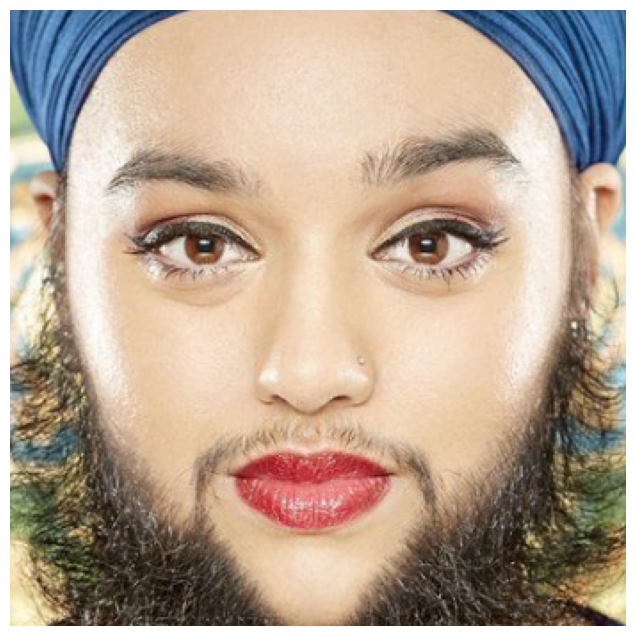

In [75]:
# crop the image
cropped_img = None
for (x, y, w, h) in face_locations:
    cropped_img = img_copy[y:y + h, x:x + w]
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [76]:
# resize the image to 224x224
resized_img = cv2.resize(cropped_img, (224, 224))
#save the image
cv2.imwrite('breaking_data/female/image_1.jpg', resized_img)

True

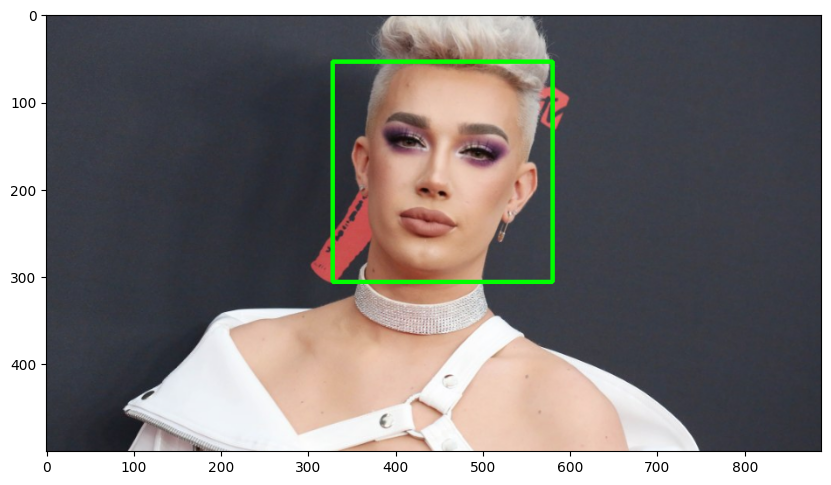

In [77]:
img = cv2.imread('breaking_data/James Charles Editorial.jpg')
img_copy = cv2.imread('breaking_data/James Charles Editorial.jpg')
# resize the image to a max_width or max_height of 500px and keep the aspect ratio
img = resize(img)
img_copy = resize(img_copy)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_locations = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(200, 200))
for (x, y, w, h) in face_locations:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(-0.5, 251.5, 251.5, -0.5)

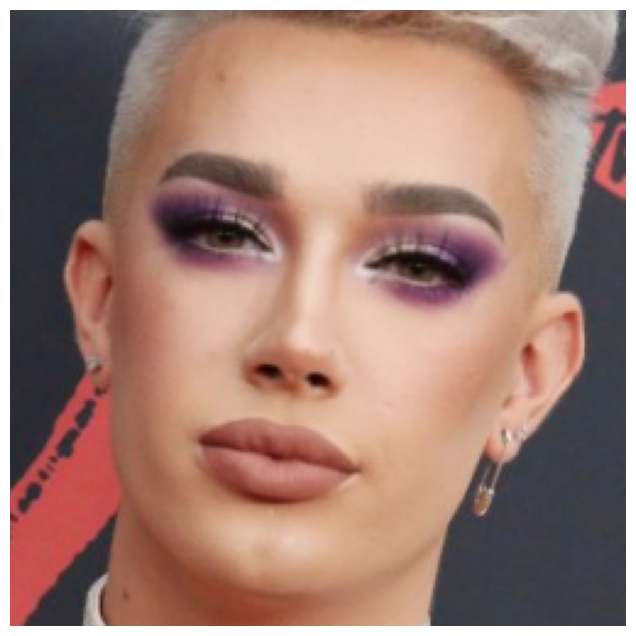

In [78]:
# crop the image
cropped_img = None
for (x, y, w, h) in face_locations:
    cropped_img = img_copy[y:y + h, x:x + w]
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [80]:
# resize the image to 224x224
resized_img = cv2.resize(cropped_img, (224, 224))
#save the image
cv2.imwrite('breaking_data/male/image_2.jpg', resized_img)

True

In [86]:
from pathlib import Path


def extract_face(image_path: Path, min_size=(200, 200)):
    img = cv2.imread(str(image_path))
    img_copy = cv2.imread(str(image_path))
    # resize the image to a max_width or max_height of 500px and keep the aspect ratio
    img = resize(img)
    img_copy = resize(img_copy)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_locations = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=min_size)

    if len(face_locations) == 0:
        raise ValueError(f'No faces found in image {image_path}. Please adjust the min_size parameter.')

    if len(face_locations) > 1:
        raise ValueError(f'Multiple faces found in image {image_path}. Please adjust the min_size parameter.')

    for (x, y, w, h) in face_locations:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

    # crop the image
    cropped_img = None
    for (x, y, w, h) in face_locations:
        cropped_img = img_copy[y:y + h, x:x + w]

    # resize the image to 224x224
    resized_img = cv2.resize(cropped_img, (224, 224))
    return resized_img

True

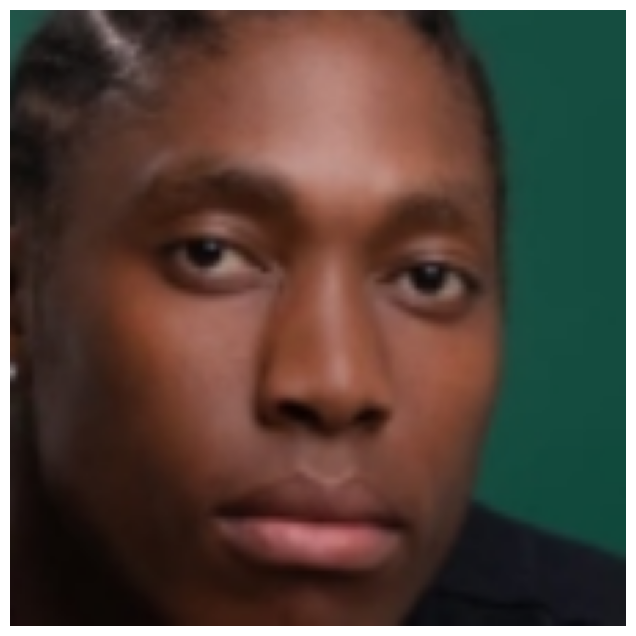

In [88]:
img = extract_face(Path('breaking_data/Caster Semenya.jpg'), (100, 100))
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
cv2.imwrite('breaking_data/female/image_2.jpg', img)